In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
data = pd.read_csv('gambling_data.csv')

# Define factors in three groups
categories_1 = ['Winning_history', 'Alcohol_consumption']
categories_2 = ['Age', 'Income', 'Frequency_of_visits', 'Gambling_experience']
categories_3 = ['Gender', 'Education', 'Location', 'Types_of_games']

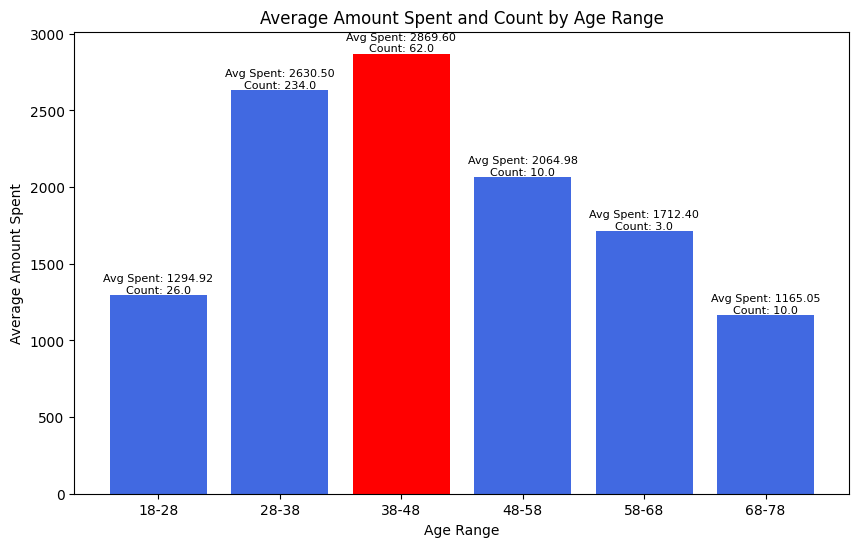

Most Spending Age Group: 38-48 yrs.


In [8]:
import matplotlib.pyplot as plt

# Calculate the mean Average Spent and Count for each age range
age_bins = range(18, 86, 10)  # Define the age range bins
age_groups = pd.cut(data['Age'], bins=age_bins, right=False, include_lowest=True)
age_stats = data.groupby(age_groups).agg({'Amount_spent': 'mean', 'Age': 'count'})
age_stats = age_stats.rename(columns={'Amount_spent': 'Average Spent', 'Age': 'Count'})

# Create the bar graph with gaps between the bars
plt.figure(figsize=(10, 6))


bar_width = 8  # Adjust this value for the desired gap width
positions = [age + bar_width / 2 for age in age_bins[:-1]]
bars = plt.bar(positions, age_stats['Average Spent'], width=bar_width, color='royalblue')

# Find the age range with the highest spending
max_spent_age_range = age_stats['Average Spent'].idxmax()
max_spent_age_group = f"{max_spent_age_range.left}-{max_spent_age_range.right}"

# Highlight the most spent age range in red
for i, bar in enumerate(bars):
    if age_bins[i] == max_spent_age_range.left:
        bar.set_facecolor('red')

# Customize the x-axis labels
plt.xticks(positions, labels=[f"{age}-{age + 10}" for age in age_bins[:-1]])

# Add data labels to the bars (Average Spent and Count)
for i, bar in enumerate(bars):
    avg_spent = age_stats.iloc[i]['Average Spent']
    count = age_stats.iloc[i]['Count']
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"Avg Spent: {avg_spent:.2f}\nCount: {count}", ha='center', va='bottom', fontsize=8)

# Customize the plot labels and title
plt.xlabel('Age Range')
plt.ylabel('Average Amount Spent')
plt.title('Average Amount Spent and Count by Age Range')

# Show the plot
plt.show()

# Print the most spent age range
print(f"Most Spending Age Group: {max_spent_age_group} yrs.")


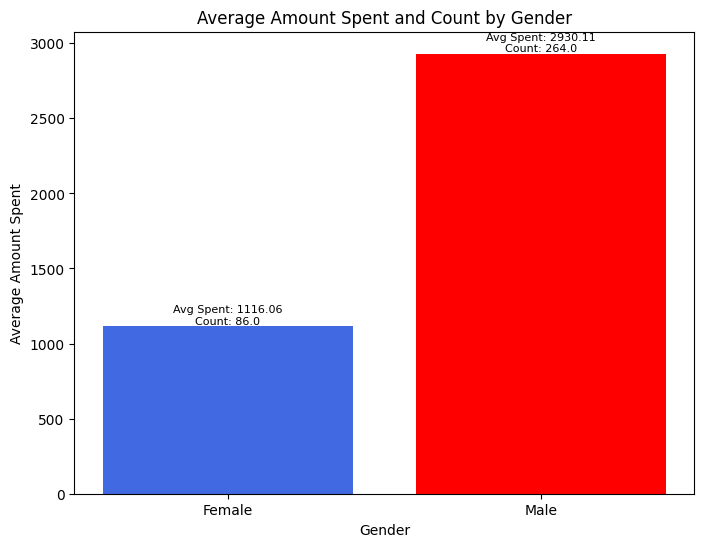

Most Spending Gender: Male


In [9]:
# Calculate the mean Average Spent and Count for each gender
gender_stats = data.groupby('Gender').agg({'Amount_spent': 'mean', 'Age': 'count'})
gender_stats = gender_stats.rename(columns={'Amount_spent': 'Average Spent', 'Age': 'Count'})

# Create the bar graph
plt.figure(figsize=(8, 6))
bars = plt.bar(gender_stats.index, gender_stats['Average Spent'], color='royalblue')

# Find the gender with the highest spending
max_spent_gender = gender_stats['Average Spent'].idxmax()

# Highlight the most spent gender in red
for i, bar in enumerate(bars):
    if gender_stats.index[i] == max_spent_gender:
        bar.set_facecolor('red')

# Customize the x-axis labels
plt.xlabel('Gender')
plt.ylabel('Average Amount Spent')
plt.title('Average Amount Spent and Count by Gender')

# Add data labels to the bars (Average Spent and Count)
for i, bar in enumerate(bars):
    avg_spent = gender_stats.iloc[i]['Average Spent']
    count = gender_stats.iloc[i]['Count']
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"Avg Spent: {avg_spent:.2f}\nCount: {count}", ha='center', va='bottom', fontsize=8)

# Show the plot
plt.show()

# Print the most spent gender
print(f"Most Spending Gender: {max_spent_gender}")


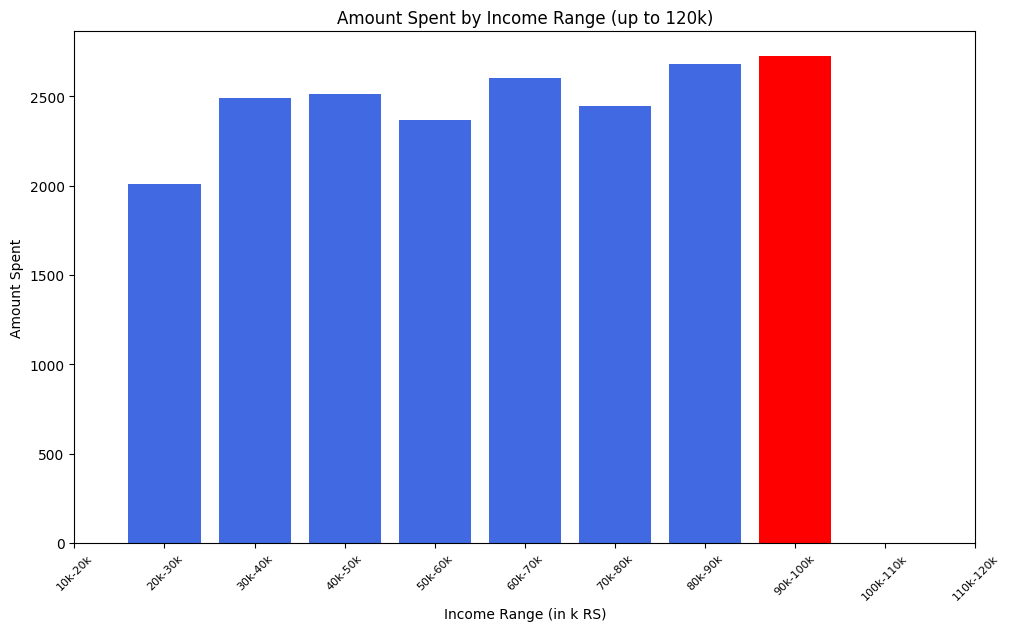

Most Spending Amount Income Range: 90k-100k RS


In [6]:
import matplotlib.pyplot as plt

# Calculate the mean amount spent for each 10,000 RS income range up to 120k
income_bins = range(10000, 120001, 10000)  # Adjust the upper limit to 120k
income_groups = pd.cut(data['Income'], bins=income_bins)
income_mean_spent = data.groupby(income_groups)['Amount_spent'].mean()

# Create the bar graph with gaps between the bars
plt.figure(figsize=(10, 6))
bar_width = 8000  # Adjust this value for the desired gap width
positions = [income + bar_width / 2 for income in income_bins[:-1]]
bars = plt.bar(positions, income_mean_spent, width=bar_width, color='royalblue')

# Find the 10,000 RS income range with the highest spending
max_spent_income_range = income_mean_spent.idxmax()
max_spent_income_group = f"{max_spent_income_range.left // 1000}k-{max_spent_income_range.right // 1000}k"

# Highlight the most spent income range in red
for i, bar in enumerate(bars):
    if income_bins[i] == max_spent_income_range.left:
        bar.set_facecolor('red')

# Customize the x-axis labels with lower font size and rotation
plt.xticks(positions, labels=[f"{income // 1000}k-{(income + 10000) // 1000}k" for income in income_bins[:-1]], rotation=45, fontsize=8)

# Ensure the labels fit within the boxes and don't overlap
plt.tight_layout()

# Customize the plot labels and title
plt.xlabel('Income Range (in k RS)')
plt.ylabel('Amount Spent')
plt.title('Amount Spent by Income Range (up to 120k)')

# Show the plot
plt.show()

# Print the most spent income range
print(f"Most Spending Amount Income Range: {max_spent_income_group} RS")


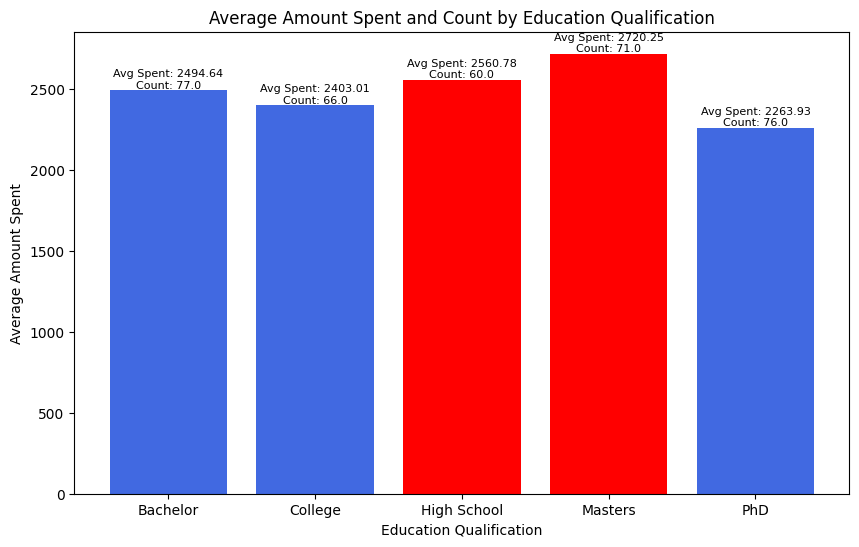

Top 2 Most Spending Education Qualifications: Masters, High School


In [10]:
# Calculate the mean Average Spent and Count for each education qualification
education_stats = data.groupby('Education').agg({'Amount_spent': 'mean', 'Age': 'count'})
education_stats = education_stats.rename(columns={'Amount_spent': 'Average Spent', 'Age': 'Count'})

# Sort education qualifications by spending in descending order and highlight the top 2 most spent qualifications in red
top_education = education_stats['Average Spent'].sort_values(ascending=False).head(2)
highlighted_education = top_education.index

# Create the bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(education_stats.index, education_stats['Average Spent'], color='royalblue')

# Highlight the top 2 most spent education qualifications in red
for i, bar in enumerate(bars):
    if education_stats.index[i] in highlighted_education:
        bar.set_facecolor('red')

# Add data labels to the bars (Average Spent and Count)
for i, bar in enumerate(bars):
    avg_spent = education_stats.iloc[i]['Average Spent']
    count = education_stats.iloc[i]['Count']
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"Avg Spent: {avg_spent:.2f}\nCount: {count}", ha='center', va='bottom', fontsize=8)

# Customize the plot labels and title
plt.xlabel('Education Qualification')
plt.ylabel('Average Amount Spent')
plt.title('Average Amount Spent and Count by Education Qualification')

# Show the plot
plt.show()

# Print the top 2 most spent education qualifications
print(f"Top 2 Most Spending Education Qualifications: {', '.join(top_education.index)}")


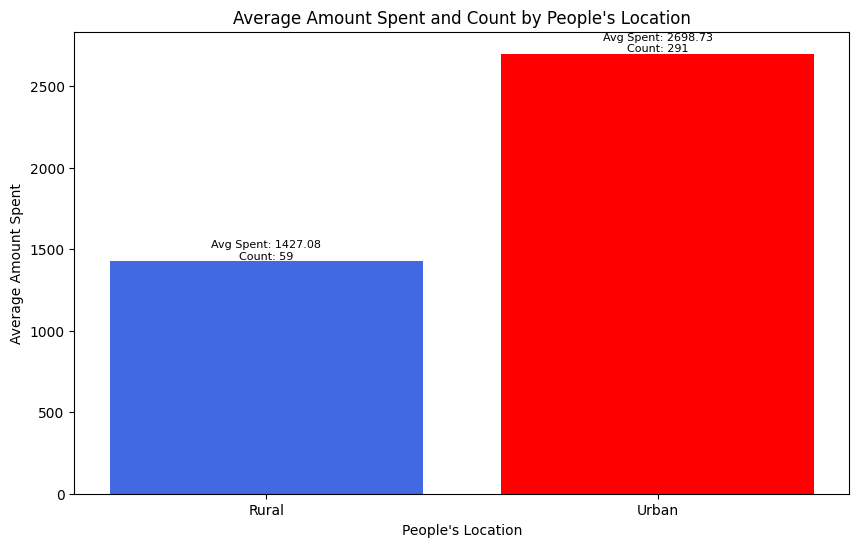

Most Spending People's Location: Urban


In [6]:
# Calculate the mean Average Spent and Count for each location
location_stats = data.groupby('Location').agg({'Amount_spent': 'mean', 'Age': 'count'})
location_stats = location_stats.rename(columns={'Amount_spent': 'Average Spent', 'Age': 'Count'})

# Create the bar graph
plt.figure(figsize=(10, 6))
plt.bar(location_stats.index, location_stats['Average Spent'], color='royalblue')

# Find the location with the highest spending
max_spent_location = location_stats['Average Spent'].idxmax()

# Highlight the most spent location in red
for bar in plt.gca().patches:
    if bar.get_height() == location_stats.loc[max_spent_location, 'Average Spent']:
        bar.set_facecolor('red')

# Add data labels to the bars (Average Spent and Count)
for i, bar in enumerate(plt.gca().patches):
    avg_spent = location_stats.loc[location_stats.index[i], 'Average Spent']
    count = location_stats.loc[location_stats.index[i], 'Count']
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"Avg Spent: {avg_spent:.2f}\nCount: {count}", ha='center', va='bottom', fontsize=8)

# Customize the plot labels and title
plt.xlabel("People's Location")
plt.ylabel('Average Amount Spent')
plt.title("Average Amount Spent and Count by People's Location")

# Show the plot
plt.show()

# Print the most spent location
print(f"Most Spending People's Location: {max_spent_location}")


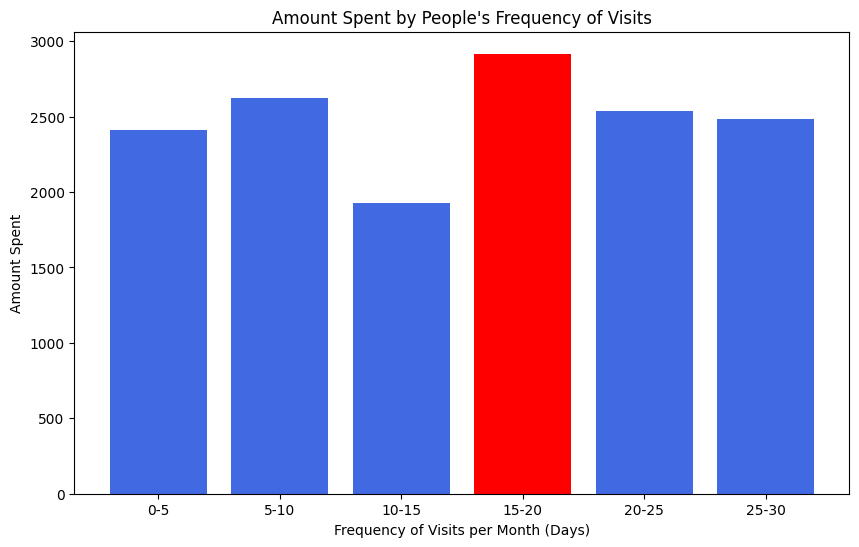

Most Spending Amount People Frequency To Come Casino Each Month: 15-20 days


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Frequency_of_visits' column to integers
data['Frequency_of_visits'] = data['Frequency_of_visits'].astype(int)

# Define the frequency range bins
frequency_ranges = [0, 5, 10, 15, 20, 25, 30]

# Create a new column with the frequency range for each data point
data['Frequency_of_visits_range'] = pd.cut(data['Frequency_of_visits'], bins=frequency_ranges, labels=frequency_ranges[:-1], right=False)

# Calculate the mean amount spent for each frequency range
frequency_mean_spent = data.groupby('Frequency_of_visits_range')['Amount_spent'].mean()

# Create the bar graph
plt.figure(figsize=(10, 6))
bar_width = 0.8  # Adjust this value for the desired gap width
positions = range(len(frequency_ranges[:-1]))
bars = plt.bar(positions, [frequency_mean_spent.get(freq, 0) for freq in frequency_ranges[:-1]], width=bar_width, color='royalblue')

# Find the frequency range with the highest spending
max_spent_frequency_range = max(frequency_ranges[:-1], key=lambda freq: frequency_mean_spent.get(freq, 0))

# Highlight the most spent frequency range in red
for i, bar in enumerate(bars):
    if frequency_ranges[:-1][i] == max_spent_frequency_range:
        bar.set_facecolor('red')

# Customize the x-axis labels
plt.xticks(positions, labels=[f"{freq}-{freq + 5}" for freq in frequency_ranges[:-1]])

# Customize the plot labels and title
plt.xlabel('Frequency of Visits per Month (Days)')
plt.ylabel('Amount Spent')
plt.title("Amount Spent by People's Frequency of Visits")

# Show the plot
plt.show()

# Print the most spent frequency range
print(f"Most Spending Amount People Frequency To Come Casino Each Month: {max_spent_frequency_range}-{max_spent_frequency_range + 5} days")


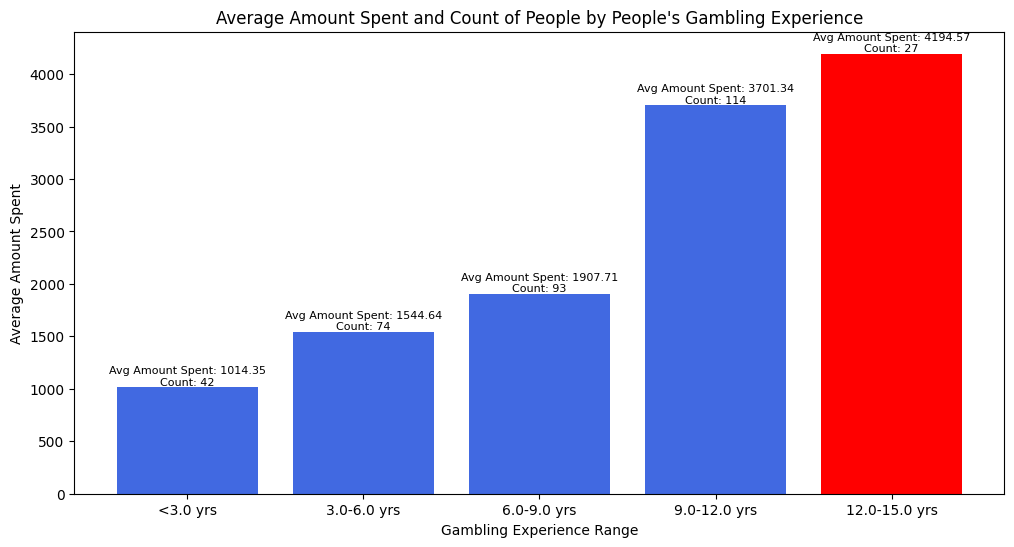

Most Spending Amount People With Gambling Experience: 12.0-15.0 yrs


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the gambling experience range bins
experience_ranges = [0, 3, 6, 9, 12, 15, float('inf')]

# Create a new column with the experience range for each data point
data['Gambling_experience_range'] = pd.cut(data['Gambling_experience'], bins=experience_ranges, right=False)

# Function to format experience range as a string
def format_experience_range(range):
    if range.left == 0:
        return f"<{range.right} yrs"
    if range.right == float('inf'):
        return f">{range.left} yrs"
    return f"{range.left}-{range.right} yrs"

# Calculate the mean Average Amount Spent and Count of People for each experience range
experience_stats = data.groupby('Gambling_experience_range').agg({'Amount_spent': 'mean', 'Age': 'count'}).reset_index()
experience_stats = experience_stats.rename(columns={'Amount_spent': 'Average Amount Spent', 'Age': 'Count of People'})

# Filter out empty ranges
experience_stats = experience_stats[experience_stats['Count of People'] > 0]

# Create the bar graph
plt.figure(figsize=(12, 6))
bar_width = 0.8  # Adjust this value for the desired gap width

# If experience_stats is empty, display a message
if not experience_stats.empty:
    positions = range(len(experience_stats))
    bars = plt.bar(positions, experience_stats['Average Amount Spent'], width=bar_width, color='royalblue')

    # Find the experience range with the highest spending
    max_spent_experience_range = experience_stats.loc[experience_stats['Average Amount Spent'].idxmax(), 'Gambling_experience_range']

    # Highlight the most spent experience range in red
    for i, bar in enumerate(bars):
        if experience_stats.loc[i, 'Gambling_experience_range'] == max_spent_experience_range:
            bar.set_facecolor('red')

    # Customize the x-axis labels
    formatted_ranges = [format_experience_range(range) for range in experience_stats['Gambling_experience_range']]
    plt.xticks(positions, labels=formatted_ranges)

    # Add data labels to the bars (Average Amount Spent and Count of People)
    for i, bar in enumerate(bars):
        avg_amount_spent = experience_stats.loc[i, 'Average Amount Spent']
        count_of_people = experience_stats.loc[i, 'Count of People']
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"Avg Amount Spent: {avg_amount_spent:.2f}\nCount: {count_of_people}", ha='center', va='bottom', fontsize=8)
else:
    # Display a message if there is no data
    plt.text(0.5, 0.5, "No data available", fontsize=12, ha='center')

# Customize the plot labels and title
plt.xlabel("Gambling Experience Range")
plt.ylabel('Average Amount Spent')
plt.title("Average Amount Spent and Count of People by People's Gambling Experience")

# Show the plot
plt.show()

# Print the most spent experience range
if not experience_stats.empty:
    print(f"Most Spending Amount People With Gambling Experience: {format_experience_range(max_spent_experience_range)}")


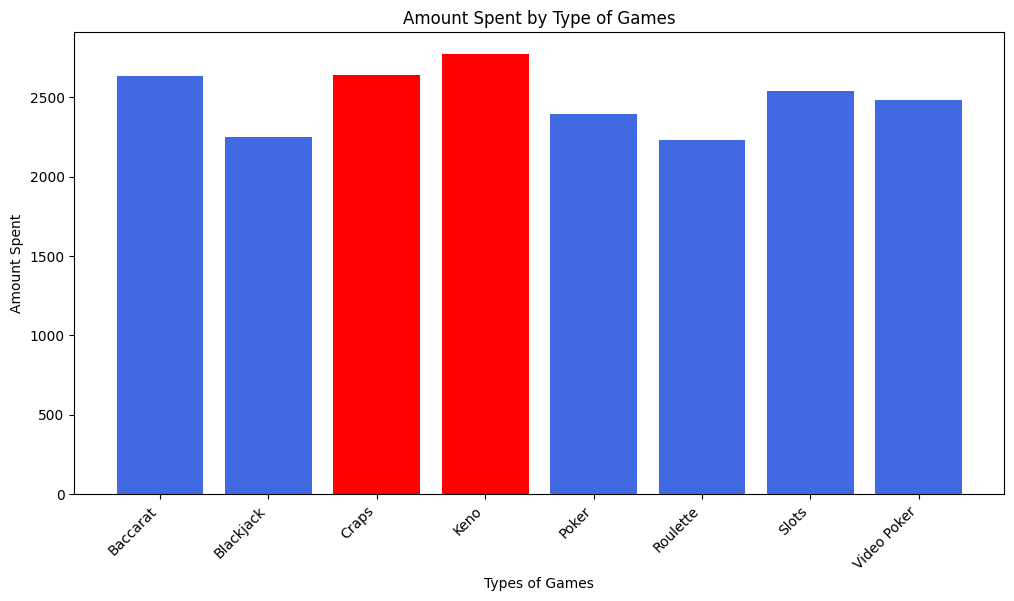

Top 2 Most Spending Games: Keno, Craps


In [9]:
import matplotlib.pyplot as plt

# Calculate the mean amount spent for each game type
game_mean_spent = data.groupby('Types_of_games')['Amount_spent'].mean()

# Create the bar graph
plt.figure(figsize=(12, 6))
bar_width = 0.8  # Adjust this value for the desired gap width
positions = range(len(game_mean_spent))
bars = plt.bar(positions, game_mean_spent.values, width=bar_width, color='royalblue')

# Sort the game types by spending in descending order and highlight the top 2 most spent games in red
top_games = game_mean_spent.sort_values(ascending=False).head(2)
highlighted_positions = [i for i, game in enumerate(game_mean_spent.index) if game in top_games.index]

for i, bar in enumerate(bars):
    if i in highlighted_positions:
        bar.set_facecolor('red')

# Customize the x-axis labels
plt.xticks(positions, labels=game_mean_spent.index, rotation=45, ha='right')

# Customize the plot labels and title
plt.xlabel('Types of Games')
plt.ylabel('Amount Spent')
plt.title("Amount Spent by Type of Games")

# Show the plot
plt.show()

# Print the top 2 most spent games
print(f"Top 2 Most Spending Games: {', '.join(top_games.index)}")


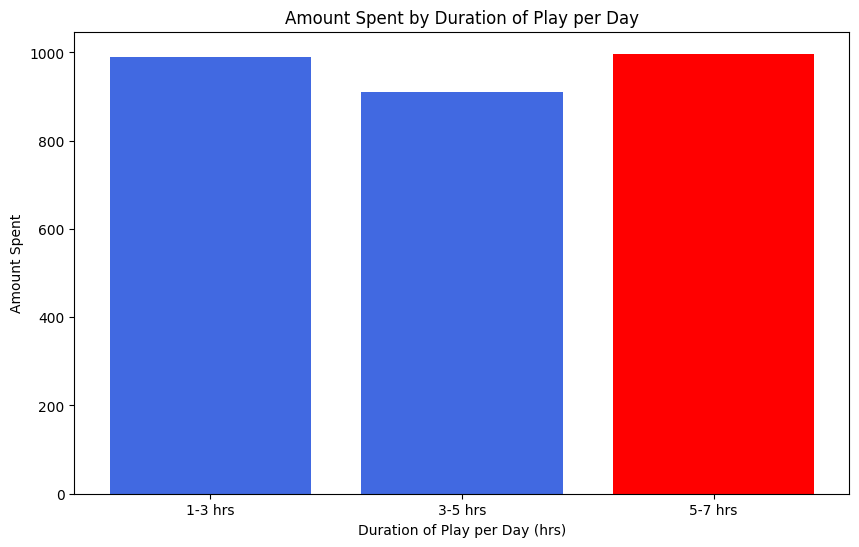

Most Spending Amount Range for Duration of Play per Day: 5-more hrs


In [10]:
import matplotlib.pyplot as plt

# Convert 'Duration_of_play' column from minutes to hours
data['Duration_of_play'] = data['Duration_of_play'] / 60

# Define the duration range bins in hours
duration_ranges = [1, 3, 5, data['Duration_of_play'].max() + 1]

# Create a new column with the duration range for each data point
data['Duration_of_play_range'] = pd.cut(data['Duration_of_play'], bins=duration_ranges, right=False)

# Calculate the mean amount spent for each duration range
duration_mean_spent = data.groupby('Duration_of_play_range')['Amount_spent'].mean()

# Create the bar graph
plt.figure(figsize=(10, 6))
bar_width = 0.8  # Adjust this value for the desired gap width
positions = range(len(duration_ranges) - 1)
bars = plt.bar(positions, [duration_mean_spent.get(range, 0) for range in duration_ranges[:-1]], width=bar_width, color='royalblue')

# Find the duration range with the highest spending
max_spent_duration_range = max(duration_ranges[:-1], key=lambda range: duration_mean_spent.get(range, 0))

# Highlight the most spent duration range in red
for i, bar in enumerate(bars):
    if duration_ranges[:-1][i] == max_spent_duration_range:
        bar.set_facecolor('red')

# Customize the x-axis labels
plt.xticks(positions, labels=[f"{range}-{range + 2} hrs" for range in duration_ranges[:-1]])

# Customize the plot labels and title
plt.xlabel('Duration of Play per Day (hrs)')
plt.ylabel('Amount Spent')
plt.title("Amount Spent by Duration of Play per Day")

# Show the plot
plt.show()

# Print the most spent duration range
print(f"Most Spending Amount Range for Duration of Play per Day: {max_spent_duration_range}-more hrs")


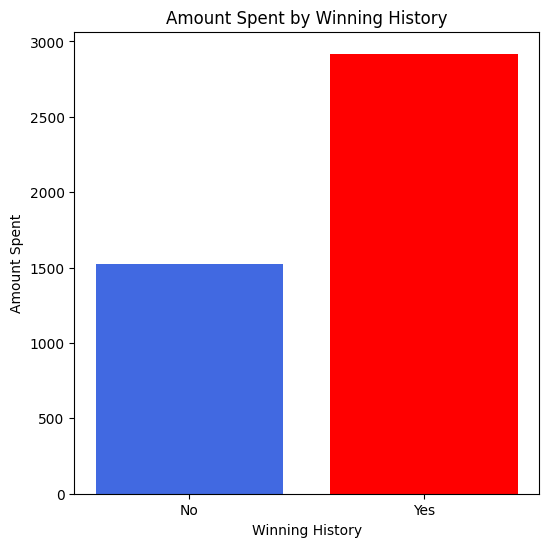

Amount Spent is more when people have winning history: Yes


In [11]:
import matplotlib.pyplot as plt

# Calculate the mean amount spent for each winning history category
winning_history_mean_spent = data.groupby('Winning_history')['Amount_spent'].mean()

# Create the bar graph
plt.figure(figsize=(6, 6))
bars = plt.bar(winning_history_mean_spent.index, winning_history_mean_spent, color='royalblue')

# Find the winning history category with the highest spending
max_spent_winning_history = winning_history_mean_spent.idxmax()

# Highlight the most spent winning history category in red
for bar in plt.gca().patches:
    if bar.get_height() == winning_history_mean_spent[max_spent_winning_history]:
        bar.set_facecolor('red')

# Customize the plot labels and title
plt.xlabel('Winning History')
plt.ylabel('Amount Spent')
plt.title('Amount Spent by Winning History')

# Show the plot
plt.show()

# Print the most spent winning history category
print(f"Amount Spent is more when people have winning history: {max_spent_winning_history}")


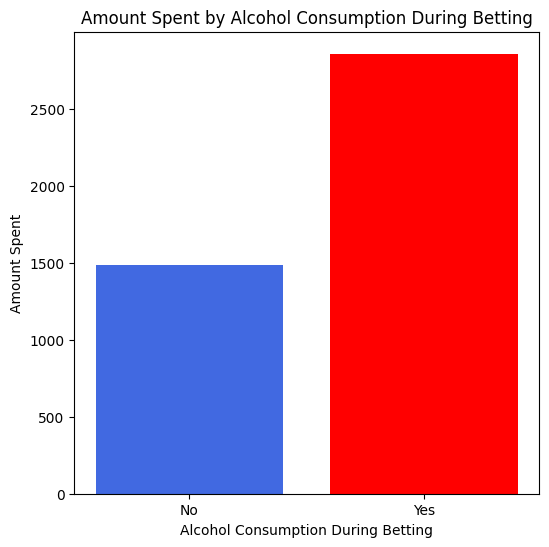

Amount Spent is more when people consume alcohol during betting: Yes


In [12]:
import matplotlib.pyplot as plt

# Calculate the mean amount spent for each alcohol consumption category
alcohol_consumption_mean_spent = data.groupby('Alcohol_consumption')['Amount_spent'].mean()

# Create the bar graph
plt.figure(figsize=(6, 6))
bars = plt.bar(alcohol_consumption_mean_spent.index, alcohol_consumption_mean_spent, color='royalblue')

# Find the alcohol consumption category with the highest spending
max_spent_alcohol_consumption = alcohol_consumption_mean_spent.idxmax()

# Highlight the most spent alcohol consumption category in red
for bar in plt.gca().patches:
    if bar.get_height() == alcohol_consumption_mean_spent[max_spent_alcohol_consumption]:
        bar.set_facecolor('red')

# Customize the plot labels and title
plt.xlabel('Alcohol Consumption During Betting')
plt.ylabel('Amount Spent')
plt.title('Amount Spent by Alcohol Consumption During Betting')

# Show the plot
plt.show()

# Print the most spent alcohol consumption category
print(f"Amount Spent is more when people consume alcohol during betting: {max_spent_alcohol_consumption}")
